# Predicting school STAAR scores

In [1]:
import pandas as pd
import numpy as np
import prepare as pr
import explore as ex
import modeling as mo

## Project Description
Our youth matters. In Texas, the State of Texas Assessment of Academic Readiness (STAAR) exam is used to measure student learning at the end of the school year. Scores on these exams are used to calculate school accountability ratings which ensures that only high performing schools stay open. We want to use the publically available data to identify key features of schools that have the largest impact on the STAAR exams. After exploration, we use a machine learning algorithm to predict the most likely STAAR exam outcome based on the features we identified as having the largest impact. The scope of this project is limited to Texas High Schools, but may be applied to other types of schools as well.

## Project Goals:
* Identify drivers of high schools' percent of students passing each STAAR subject
* Build a regression model to predict passing percentage of STAAR scores 
* Deliver results in a final notebook
* Deliver presentation to stakeholders

## Acquisition and Data Preperation
* Functions to use webscraping were engineered to extract data from the Texas Education Agency's website
* Schools that had special characters were removed from analysis
    * special characters (*, -, ?, n/a)
* Nulls were removed:
    * Nulls or reserved information was incoded into the special characters above and removed
    * All the percent signs, dollar signs, and commas were removed from values
* Columns were combined into desired features
    * high_edu was generated from combining percent of teachers that have a masters or doctorate
    * Features for teacher_exp_0to5, teacher_exp_6to10, and teacher_exp_11_plus were generated from combining:
        * Beginning teachers and teachers with 1-5 years of experience into teacher_exp_0to5
        * Teachers with 11+ years of experience were combined into teacher_exp_11_plus
        * teacher_exp_6to10 stayed the same. Teachers of 6-10 years of experience
* There were an initial 1571 rows
    * The total number of rows after preperation and cleaning is 1391
* Separate into train, validate, and test datasets

## Data Dictionary  

| Feature | Definition |
|:--------|:-----------|
|school_id| The id number of the school from TEA|
|english_1| English I, percent of students at approaches grade level or above for English I|
|english_2| English II, percent of students at approaches grade level or above for English II|
|algebra| Algebra, percent of students at approaches grade level or above for Algebra|
|biology| Biology, percent of students at approaches grade level or above for Biology|
|history| U.S. History, percent of students at approaches grade level or above for U.S. History|
|bilingual_or_english_learner| EB/EL Current and Monitored, percent of students in the dual-language program that enables emergent bilingual (EB) students/English learners (ELs) to become proficient in listening, speaking, reading, and writing in the English language through the development of literacy and academic skills in the primary language and English.|
|teacher_exp_0to5| Integer, number of teachers with 0-5 years of experience|
|teacher_exp_6to10| Integer, number of teachers with 6-10 numbers of experience|
|teacher_exp_11_plus| Integer, number of teachers with 11 or more years of experience|
|extracurricular_expend| The amount of funds (in dollars) spent on extracurriculuars per student|
|total_expend| The average total amount of funds (in dollars) spent per student|
|econdis| students that are from homes that are below the poverty line
|salary| Average Actual Salary, Average amount teachers are being paid in dollars|
|high_edu| Percent of teachers with a masters or doctorate degree|
|ratio| Count of the number of students per one teacher|

In [2]:
#loading in cleaned data
df=pr.clean_df()
df.head(3)

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4
2,1904001,78.0,80.0,90.0,87.0,88.0,4.7,42.2,51538.0,15.2,2151.0,10885.0,8.8,42.2,42.6,37.0


In [3]:
train,val,test=ex.tts(df)

## Exploration
For exploration, we have 5 target variables. Each STAAR exam subject was explored using a variety of questions and the resulting insights were found. 

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Do schools with more economically disadvantaged students have a lower average STAAR score for biology than all schools?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score for biology in schools with 50% or more  economically disadvantaged students and all schools</dd>
        <dd>- $H_a$: The difference in the average STAAR score for biology is <strong>significantly lower</strong> in schools with 50% or more economically disadvantaged students compared to all schools</dd>
    </dl>
</div>

In [4]:
ex.abv_avg_staar_df(train)

,Above Average,Below Average,p-value
English 1,59.33,75.19,4.790567e-40
English 2,65.54,79.29,1.439728e-34
Algebra,68.30,78.35,1.183526e-15
Biology,77.66,88.10,5.583533e-28
U.S. History,84.18,91.61,3.802130e-22


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Do schools with teachers that have more years of experience have a better average STAAR score passing rates?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score passing rates in schools with 48.5% (all schools average) or fewer teachers with 11 years of experience or more and schools with more than 48.5% of their teachers with 11 years of experience or more</dd>
        <dd>- $H_a$: The difference in the average STAAR score passing rates is <strong>significantly lower</strong> in schools with 48.5% or fewer teachers with 11 years of experience or more compared to schools with 48.5% or more teachers with 11 years of experience or more </dd>
    </dl>
</div>

In [5]:
ex.teacher_ex(df)

,Above Average,Below Average,p-value
English 1,71.20,62.79,8.067572e-12
English 2,76.03,68.33,1.599697e-11
Algebra,77.71,68.50,1.294142e-13
Biology,85.90,79.49,2.454686e-11
U.S. History,89.94,85.59,1.435440e-08


This table shows each subject and the percent of students that pass each subjects STAAR exam. The column 'Above Average' represents the the averages for schools that have above average precent of their teachers that have 11 or more years of experience. Conversly, 'Below Average' represents the averages for schools that have below average percent of their teachers with 11 or more years of experience.

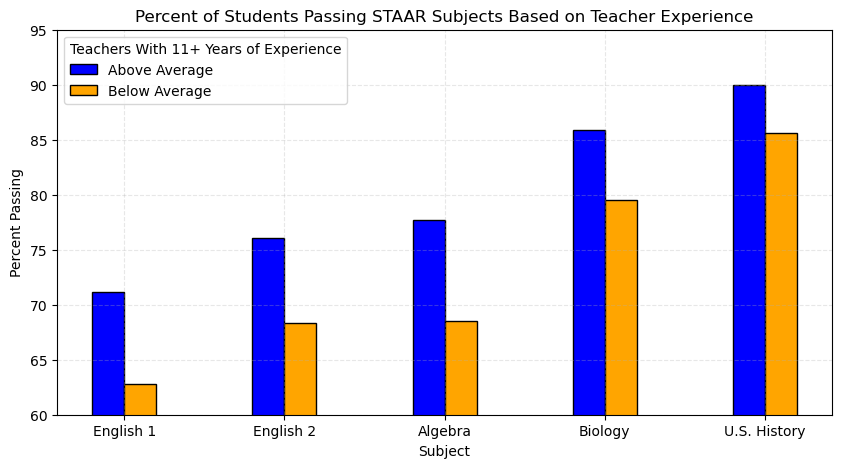

In [6]:
ex.q2_plot(df)

**Takeaway**
* Schools that have an above average amount of teachers with 11 or more years of experience have significantly higher passing rates for students STAAR exams across all subjects.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Of schools with above average economically disadvantaged students, do the schools with higher average STAAR scores get more funding per student?</dt>
        <dd>- $H_0$: There is no difference in the funding per student in schools with above average percent economically disadvantaged students and above average percent passing STAAR exams compared to schools with above average percent economically disadvantaged students and less than average percent passing STAAR scores</dd>
        <dd>- $H_a$: The difference in the average funding per student in schools with an above average economically disadvantaged students and above average percent passing STAAR exams is <strong>significantly more</strong> than schools with above average percent economically disadvantaged students and below average percent passing STAAR scores</dd>
    </dl>
</div>

In [7]:
ex.above_avg_econdis_total_expend(train)

,Above Average,Below Average,p-value
Algebra,9960.708134,10199.000000,0.644084
English 1,9763.162921,10326.412844,0.276248
English 2,9498.323383,10665.835897,0.022970
Biology,9732.004525,10504.160000,0.135932
History,9398.793103,11027.323171,0.001723


In [ ]:
ex.v

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Do schools with above average economically disadvantaged students have significantly higher total expendature per student?</dt>
        <dd>- $H_0$: There is no difference in total expendature per student in schools with above average economically disadvantaged students and schools with below average economically disadvantaged students</dd>
        <dd>- $H_a$: Schools with above average economically disadvantaged students have <strong>significantly higher</strong> total expendature per student than schools with below average economically disadvantaged students</dd>
    </dl>
</div>

In [8]:
ex.spend_v_eco(train)

(43.79055703379938, 1.669564838067672e-210)

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>Is there a statisticaly significant correlation between the amount of extracurricular expendatures and algebra passing rates?</dt>
        <dd>- $H_0$: There is no significant correlation between the amount of extracurricular expendatures and algebra passing rates</dd>
        <dd>- $H_a$: There is a significant correlation between the amount of extracurricular expendatures and algebra passing rates</dd>
    </dl>
</div>

In [9]:
ex.extra_subs(train)

,Correlation,p-value
English 1,0.147849,3.472362e-05
English 2,0.148891,3.051963e-05
Algebra,0.185599,1.849293e-07
Biology,0.166587,2.986320e-06
History,0.123032,5.833295e-04


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 6:</h2>
    </header>
    <dl>
        <dt>Is there a statisticaly significant correlation between student teacher ratio and all subjects passing rates?</dt>
        <dd>- $H_0$: There is no significant correlation between student teacher ratio and all subjects passing rates</dd>
        <dd>- $H_a$: There is a significant correlation between student teacher ratio and all subjects passing rates</dd>
    </dl>
</div>

,Correlation,p-value
English 1,-0.030873,0.389809
English 2,0.017873,0.618645
Algebra,-0.139289,0.000097
Biology,-0.046309,0.196944
History,0.034252,0.340023


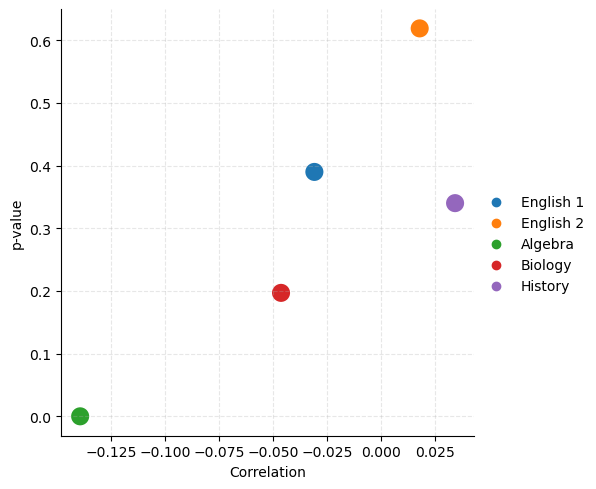

In [10]:
ex.correlation_stu_teach_ratio_subject(train)

# Modeling

In [11]:
mo.model_results(df)

,Train Baseline RMSE,Validate Baseline RMSE,Train Model RMSE,Validate Model RMSE,Model Difference
English 1,17.621105,17.625561,13.836784,13.755213,0.081571
English 2,16.370091,16.180676,12.825528,12.618093,0.207434
Algebra,17.829199,16.901255,16.140168,15.835747,0.304421
Biology,13.768268,13.354411,11.461462,11.220742,0.240720
U.S. History,11.018929,10.230069,9.387695,8.717284,0.670411


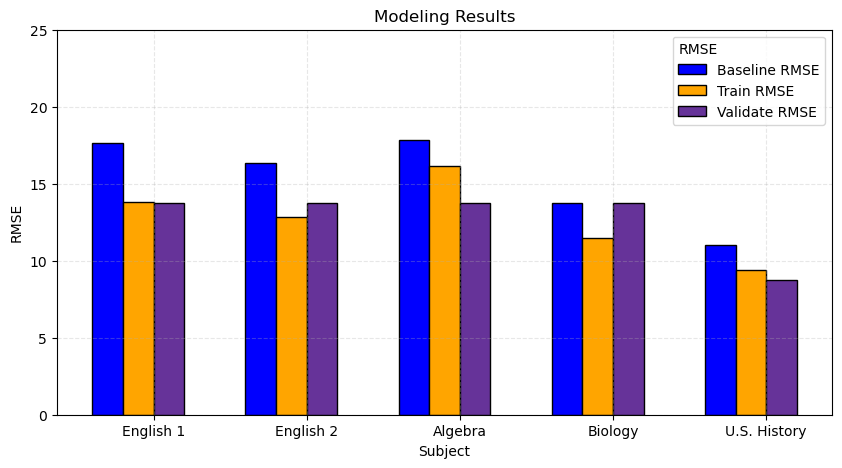

In [12]:
mo.modeling_visual(df)

<div class="alert alert-info">
    <header>
    <h2>Modeling Summary</h2>
    </header>
    <dl>
        <dd>- Using linear regression, all models beat baseline. Linear regression was the best performing model across all subjects</dd>
        <dd>- RMSE was fairly low to start with using the mean as the baseline</dd>
        <dd>- Test takeaway</dd>
    </dl>
    <header>
    <h2>Conclusion</h2>
    </header>
    <dl>
        <dd>- We were successfully able to model and predict passing percentages for each subjects STAAR exam</dd>
        <dd>- We found economically disadvantaged students have lower passing percentages</dd>
        <dd>- Among schools with above average economic disadvantaged student percentages, schools that spend more funding per student have significantly higher passing rates in U.S. History and English 2</dd>
    </dl>
    <header>
    <h2>Next Steps</h2>
    </header>
    <dl>
        <dd>- Rescrape the TEA website to acquire new features and data to explore other drivers of STAAR exam passing percentages</dd>
        <dd>- Something else</dd>
    </dl>
</div>